<a href="https://colab.research.google.com/github/jithesh9539/Connected_Deep_Networks/blob/main/Connected_Deep_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip list | grep tensor

tensorboard                   2.8.0
tensorboard-data-server       0.6.1
tensorboard-plugin-wit        1.8.1
tensorflow                    2.8.0
tensorflow-datasets           4.0.1
tensorflow-estimator          2.8.0
tensorflow-gcs-config         2.8.0
tensorflow-hub                0.12.0
tensorflow-io-gcs-filesystem  0.24.0
tensorflow-metadata           1.6.0
tensorflow-probability        0.15.0


In [2]:
!pip list | grep torch

torch                         1.10.0+cu111
torchaudio                    0.10.0+cu111
torchsummary                  1.5.1
torchtext                     0.11.0
torchvision                   0.11.1+cu111


In [3]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [4]:
import numpy as np

# Initialize a numpy ndarray with 3 rows, 2 columns
X = np.zeros((3, 2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [5]:
# By default, ndarrays are float64
X.shape, X.dtype

((3, 2), dtype('float64'))

In [6]:
# We can set values of a whole row
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [7]:
  # We can set values of a whole column
  X[:, 0] = 2
  X

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [8]:
X = np.array([
  [1, 2],
  [3, 4],
  [5, 6]
])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [9]:
x = np.array([10, 20])
print(x)
print(X.shape, x.shape)

# We can add ndarrays of different dimensions
X + x

[10 20]
(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [10]:
X.shape, x.shape

((3, 2), (2,))

In [11]:
# Element-wise multiplication

X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [13]:
# Matrix multiplication

x = np.array([[10, 20],]).T
result = X @ x  # alternatively, np.dot(X, x)
result

array([[ 50],
       [110],
       [170]])

In [14]:
X = np.random.rand(3, 2)
X

array([[0.15248651, 0.24502535],
       [0.16734699, 0.61973889],
       [0.44314858, 0.59594325]])

In [15]:
X > 0.5

array([[False, False],
       [False,  True],
       [False,  True]])

In [16]:
X[X > 0.5] = 1
X

array([[0.15248651, 0.24502535],
       [0.16734699, 1.        ],
       [0.44314858, 1.        ]])

**Plotting**

In [17]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')

<Figure size 432x288 with 0 Axes>

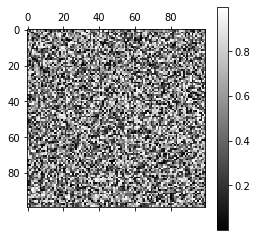

In [18]:
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

In [19]:
x = np.linspace(0, 100)
y = x * 5 + 10
# y = x * w + b

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


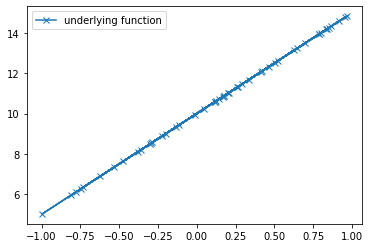

In [20]:
# x is 1-dimensional

n = 50

d = 1
x = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

**Prediction Function**

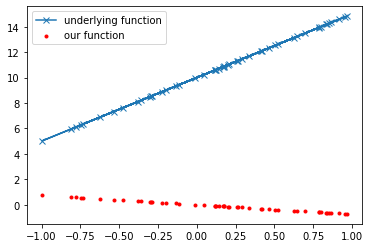

In [21]:
# Let's initialize our predictions

class Linear:
  def __init__(self, input_dim, num_hidden=1):
    # The initialization is important to properly deal with different
    # input sizes (otherwise gradients quickly go to 0).
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    return x @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

**Loss Function**

In [22]:
# How wrong are these initial predictions, exactly?
# It's up to us, and our definition is called the loss function.
# Let's use Mean Squared Error (MSE) as our loss function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()
  
loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 127.4427539346649


**Back Propogation**

In [23]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [24]:
# Take one step forward and one step backward to make sure nothing breaks, and that the loss decreases.
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

144.22572261875865
93.3543341442212


**Train using Gradient Descent**

Epoch 0, loss 130.37864272952174
Epoch 5, loss 15.033787647372995
Epoch 10, loss 2.681173815998738
Epoch 15, loss 0.9418923700217218
Epoch 20, loss 0.4776009506068868
Epoch 25, loss 0.2657402182442758
Epoch 30, loss 0.15048186221306403
Epoch 35, loss 0.08547994353705411


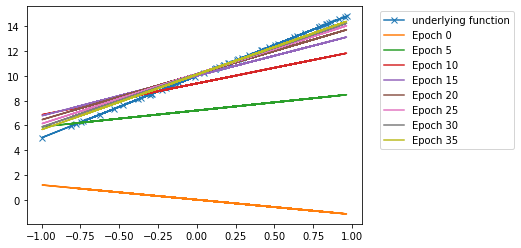

In [25]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 40
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

  gradient_from_loss = loss.backward()
  linear.backward(gradient_from_loss)
  linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");